# Projeto Machine Learning

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

**Habilidades Avaliadas**: 
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

**Sobre o projeto**:
O projeto foi proposto pelo [Minerando Dados](https://minerandodados.com.br/) através do curso [Data Science do Zero](https://minerandodados.com.br/curso-de-data-science/) como parte da composição do portfólio.

Também devo ressaltar que foi inspirado pelo trabalho da monitora do curso [Karinne Cristina](https://github.com/karinnecristina).

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI e pode ser visualizada [aqui](https://archive.ics.uci.edu/ml/datasets/Adult).

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**fnlwgt**: Final weight é o peso final

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc).

**income**: Renda em dólar, por ano.

Na leitura da base de dados, o `na_values= '?'` é para o pandas entender que os ? são valores faltantes.

In [2]:
df=pd.read_csv('/home/amador/dados/adult.data',na_values='?')

## Conhecendo a Base de Dados

In [3]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        matital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
df.tail()

age      workclass  fnlwgt    education  education-num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            matital-status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital-gain  capital-loss  hours-per-week  native-country  income  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
matital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
matital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [7]:
# Variáveis numéricas.
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
# Variáveis categóricas.
df.describe(include=['O'])

workclass education       matital-status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native-country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

In [9]:
# visualização geral dos datasets
profile = ProfileReport(df, title='Renda',html={'style':{'full_width':True}})
profile

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   matital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'matital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
# valores únicos em df.fnlwgt
len(df.fnlwgt.unique())

21648

In [13]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [14]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [15]:
# Distribuição das classes (variável income)
sns.catplot(x='income',kind='count',data=df,orient="h");

In [16]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

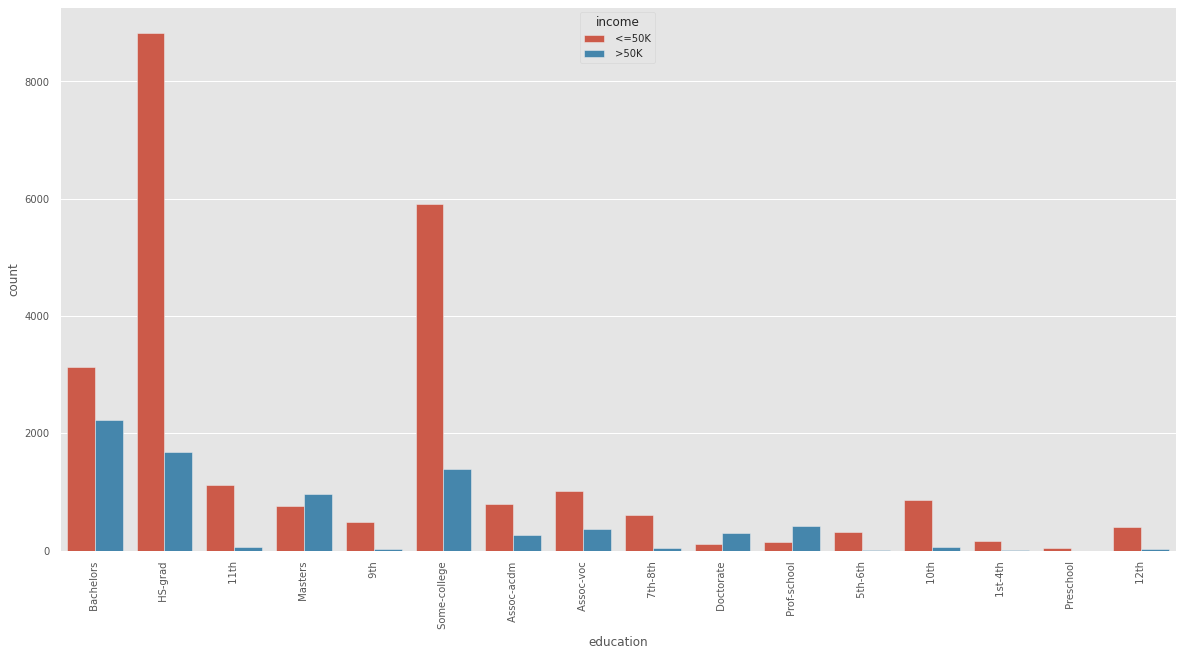

In [17]:
# Distribuição das classes por Nível de Escolaridade
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=90);

In [18]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Veja a dificuldade em visualizar a coluna 'hours-per-week'.

Abaixo, resolvemos esse problema.

In [19]:
# Verificando a menor e a maior jornada de trabalho.
print(df['hours-per-week'].min())
print(df['hours-per-week'].max())

1
99


In [20]:
# quantidade de valores únicos em 'hours-per-week'
len(df['hours-per-week'].unique())

94

In [21]:
# valores únicos em 'hours-per-week'
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [22]:
hour=pd.DataFrame(df['hours-per-week'].value_counts())
hour.reset_index(inplace=True)
hour.columns=(['valores','horas'])
list(hour.values)

[array([   40, 15217]),
 array([  50, 2819]),
 array([  45, 1824]),
 array([  60, 1475]),
 array([  35, 1297]),
 array([  20, 1224]),
 array([  30, 1149]),
 array([ 55, 694]),
 array([ 25, 674]),
 array([ 48, 517]),
 array([ 38, 476]),
 array([ 15, 404]),
 array([ 70, 291]),
 array([ 10, 278]),
 array([ 32, 266]),
 array([ 24, 252]),
 array([ 65, 244]),
 array([ 36, 220]),
 array([ 42, 219]),
 array([ 44, 212]),
 array([ 16, 205]),
 array([ 12, 173]),
 array([ 43, 151]),
 array([ 37, 149]),
 array([  8, 145]),
 array([ 52, 138]),
 array([ 80, 133]),
 array([56, 97]),
 array([28, 86]),
 array([99, 85]),
 array([46, 82]),
 array([18, 75]),
 array([72, 71]),
 array([75, 66]),
 array([ 6, 64]),
 array([ 5, 60]),
 array([ 4, 54]),
 array([47, 49]),
 array([84, 45]),
 array([22, 44]),
 array([54, 41]),
 array([ 3, 39]),
 array([33, 39]),
 array([39, 38]),
 array([41, 36]),
 array([14, 34]),
 array([ 2, 32]),
 array([27, 30]),
 array([26, 30]),
 array([17, 29]),
 array([49, 29]),
 array([90, 

In [23]:
hour.columns

Index(['valores', 'horas'], dtype='object')

In [24]:
sns.scatterplot(data=hour, x='valores',y='horas');

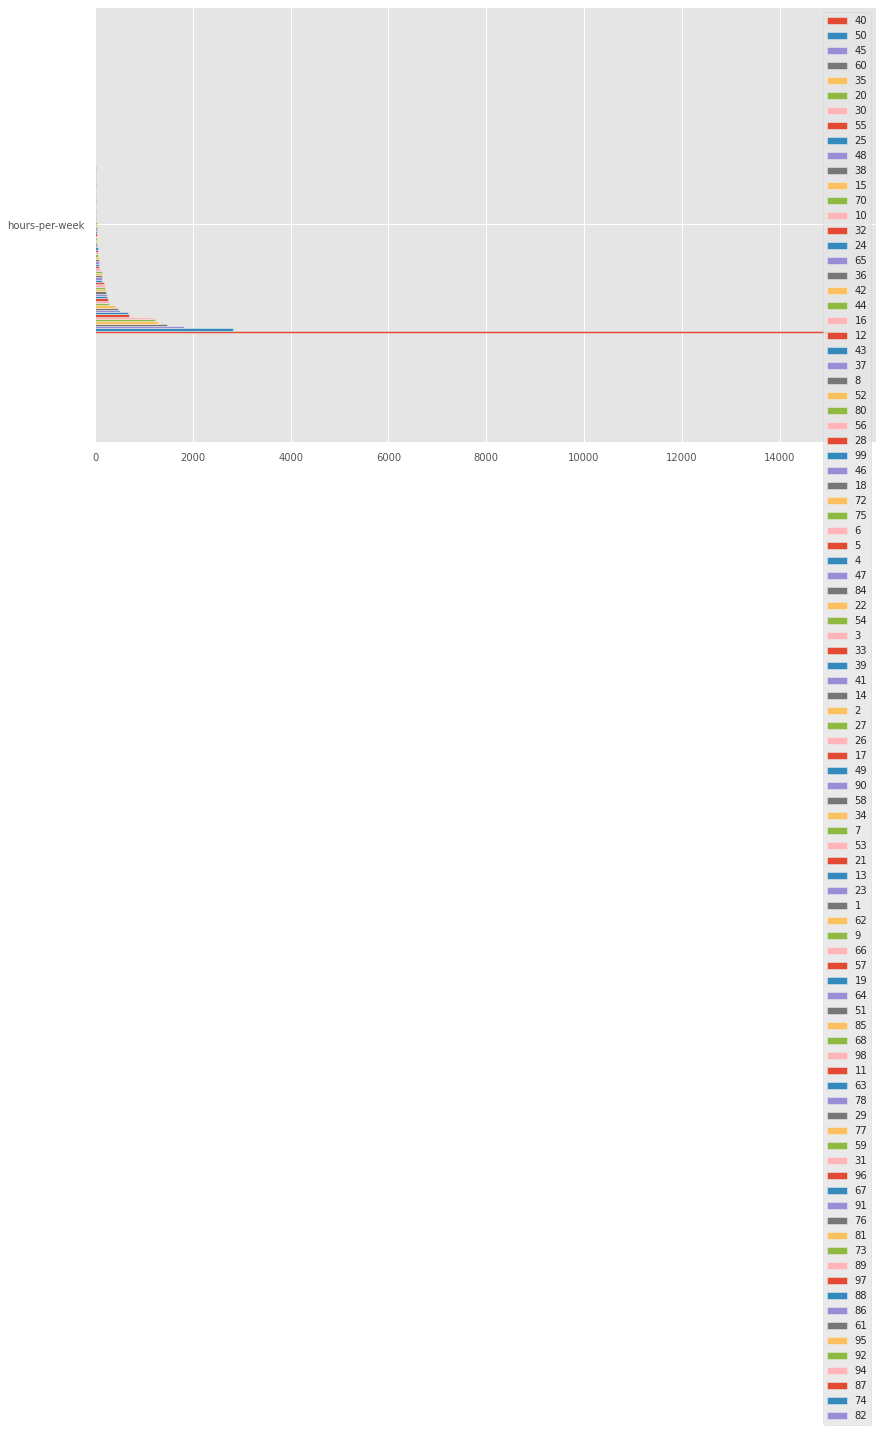

In [25]:
# tentando outra abordagem
hour_t=pd.DataFrame(df['hours-per-week'].value_counts())
hour_t=hour_t.T
hour_t.plot(kind='barh',figsize=(14,8));

Veja que mesmo com com a contagem de valores a visualização está bem ruim, por isso é interessante dividir por categorias.

O único insight que podemos tirar desses gráficos é que há apenas um valor em horas de trabalho que realmente é expressivo. 40h semanais com 15217 contagens.

Além de que, isso não nos mostra nada em relação ao valor final.

Na verdade, se houvesse a intenção de entender algo em relação a esse distribuição, poderiamos utilizar apenas partes dos dados, mas na verdade o que queremos é entender como se relaciona com os valores trabalhados por horas. 

Pra isso será feita uma categorização dos dados e todos esses 94 dados serão divididos em 3 categorias, que serão:

* 0-30 (jornada curta)
* 30-40 (jornada normal)
* 40-100 (jornada extra

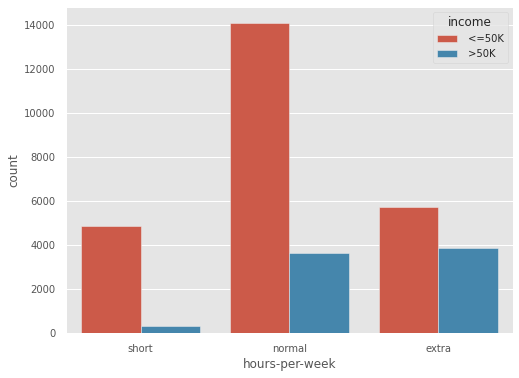

In [26]:
df['hours-per-week'] = pd.cut(df['hours-per-week'],[0,30,40,100], labels =['short','normal','extra'])

# Distribuição das classes por Horas trabalhadas
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'hours-per-week',  hue = 'income');

In [27]:
df['hours-per-week'].value_counts()

normal    17735
extra      9581
short      5245
Name: hours-per-week, dtype: int64

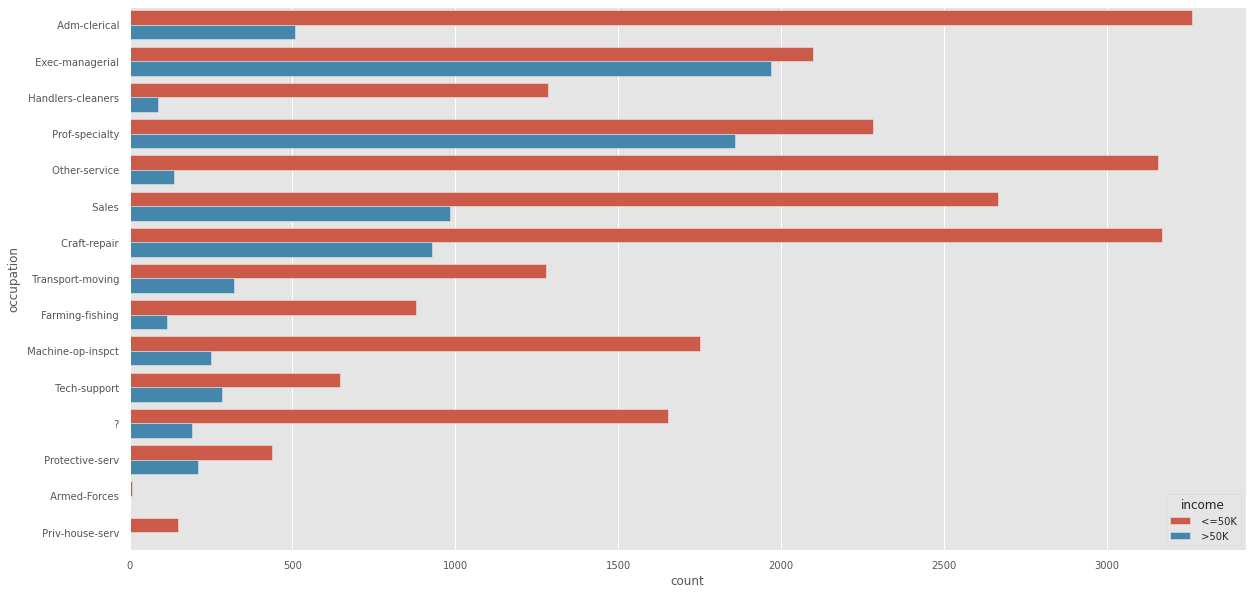

In [28]:
# Distribuição das classes de acordo com a ocupação
plt.figure(figsize=(20,10))
sns.countplot(data=df, y = 'occupation',  hue = 'income');

In [29]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

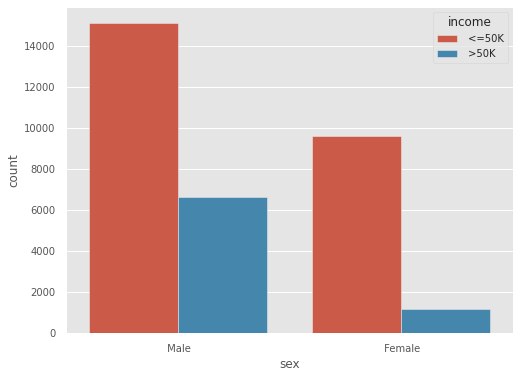

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x="sex", hue='income', data=df);

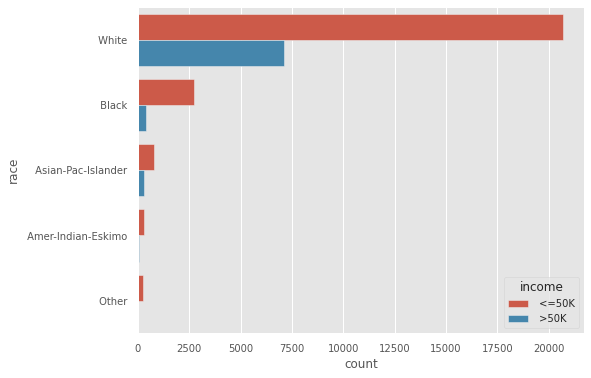

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(y="race", hue='income', data=df);

In [32]:
# Verificando a idade mínima e máxima do dataset.
print(f'A idade mínima é: {df.age.min()} anos')
print(f'A idade máxima é: {df.age.max()} anos')

A idade mínima é: 17 anos
A idade máxima é: 90 anos


In [33]:
# Para uma melhor visualização vamos agrupar as idades em 3 categorias:
# 0-25 anos (jovens)
# 25-50 anos (adultos)
# 50-100 anos (idosos)
df['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])

# Verificando como ficou a distribuição.
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'age',  hue = 'income');

####  <span style="color:Blue">  Verificação e Análise de Dados </span>
2) Faça uma análise e pre-processamento nos dados:

* **a)** Verifique se existem dados missing.
* **b)** Converta colunas categóricas para numéricas usando **LabelEnconder** ou **OneHotEnconder**.
* **c)** Explique qual técnica de conversão você usou e por quê.

**Como fazer?**

Para visualizar dados missing consulte o capítulo **Python para Análise de Dados**.

Para converter dados categóricos veja as seguintes aulas sobre LabelEncoder e One Hot Enconder no Capítulo de Machine Learning:
* **SVM - Criando um Classificador de Músicas do Spotify - Aula 07**

> Através do exemplo prático mostramos como funciona a técnica Label Encoding com suas vantagens e desvantagens e como aplicar na base de dados.

* **SVM - Processando Dados Categóricos com o One hot Enconding- Aula 08**
> Nesta aula você irá entender os conceitos do One Hot Encoding e as alterações que serão feitas na base de dados.

* **SVM - Aplicando o Get Dummies nos Dados - Aula 09**
> Por fim, na aula 09 aplicamos o One Hot Enconding na base de dados utilizando o método get_dummies() conforme cobrado no exemplo acima.

In [34]:
# Verificando a quantidade de valores nulos no dataset.
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

Empty DataFrame
Columns: [total, percent]
Index: []

In [35]:
# Preenchendo os valores nulos da coluna 'workclass'.
top = 'Private'
df['workclass'] = df['workclass'].fillna(top)

In [36]:
# Preenchendo os valores nulos da coluna 'occupation'.
top = 'United-States'
df['occupation'] = df['occupation'].fillna(top)

In [37]:
# Preenchendo os valores nulos da coluna 'native-country'.
top = 'Prof-specialty'
df['native-country'] = df['native-country'].fillna(top)

In [38]:
# Verificando se ainda existem valores nulos no Dataset.
if df.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existe valores nulos no dataset? {True}')
else:
    print(f'Existe valores nulos no dataset? {False}')

Existe valores nulos no dataset? False


In [39]:
# Criando uma nova coluna com a renda final.
df['capital_last'] = df['capital-gain'] - df['capital-loss']

In [40]:
#Criando função para remover as features sempre que necessário.
# A coluna 'educational-num' está preenchida com o código referente a cada nível de escolaridade, dessa maneira podemos excluir a coluna 'education'.
# As colunas 'capital-gain' e 'capital-loss' estão representadas pela nova coluna que criamos anteriormente.
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)

In [41]:
# removendo features
remove_features(['capital-gain','capital-loss','education'])

In [42]:
# Transformando as variáveis categóricas em numéricas.
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [43]:
df.head()

workclass  education-num  matital-status  occupation  relationship  race  \
0          7             13               4           1             1     4   
1          6             13               2           4             0     4   
2          4              9               0           6             1     4   
3          4              7               2           6             0     2   
4          4             13               2          10             5     2   

   sex  native-country  income  capital_last  age_young  age_adult  age_old  \
0    1              39       0          2174          0          1        0   
1    1              39       0             0          0          1        0   
2    1              39       0             0          0          1        0   
3    1              39       0             0          0          0        1   
4    0               5       0             0          0          1        0   

   hours-per-week_short  hours-per-week_normal  hours-per-week_extra  
0                     0                      1                     0  
1                     1                      0                     0  
2                     0                      1                     0  
3                     0                      1                     0  
4                     0                      1                     0

In [44]:
# Possibilita a análise simultânea da associação entre variáveis.
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f');

In [45]:
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

education-num            0.335154
hours-per-week_extra     0.244120
sex                      0.215980
capital_last             0.214428
age_adult                0.130379
age_old                  0.097687
occupation               0.075468
race                     0.071846
workclass                0.051604
native-country           0.015840
hours-per-week_normal   -0.092129
hours-per-week_short    -0.177816
matital-status          -0.199307
relationship            -0.250918
age_young               -0.258270
Name: income, dtype: float64

In [46]:
# Separando a classe dos Dados.
previsores = df.drop('income',axis=1)
classe = df['income']

In [47]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
clf.fit(previsores, classe)

RandomForestClassifier(random_state=12)

In [48]:
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

capital_last             0.219190
education-num            0.187296
relationship             0.128318
matital-status           0.116386
occupation               0.113819
workclass                0.069644
native-country           0.033979
hours-per-week_extra     0.027437
race                     0.024608
age_young                0.023859
sex                      0.016311
hours-per-week_short     0.012638
hours-per-week_normal    0.008982
age_old                  0.008787
age_adult                0.008748
dtype: float64

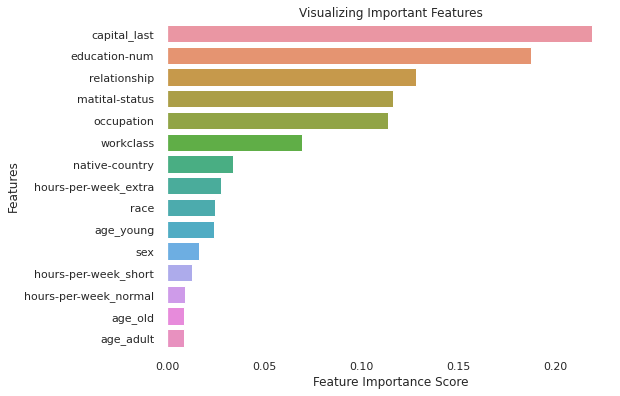

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [50]:
# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

capital_last: 22%
education-num: 19%
relationship: 13%
matital-status: 12%
occupation: 11%
workclass: 7%
native-country: 3%


In [51]:
# Treinando os modelos utilizando apenas as features selecionadas.
previsores = df[features_selected]
classe = df['income']

In [52]:
# Criando modelo de Machine Learning a partir de cada algoritmo
# Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos.
# Vamos aplicar a  Padronização ao conjunto de dados (colocando-os na mesma escala).
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.

# Não utilizarei o modelo SVC, pois ele não funciona bem quando temos um grande conjunto de dados
# porque o tempo de treinamento necessário é maior. 

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
#pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     previsores, 
                                                     classe, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.818034 (0.005047)
Scaled-KNN: 0.834127 (0.006888)
Scaled-CART: 0.851847 (0.003382)
Scaled-NB: 0.802555 (0.003500)
Scaled-RF: 0.854396 (0.003139)


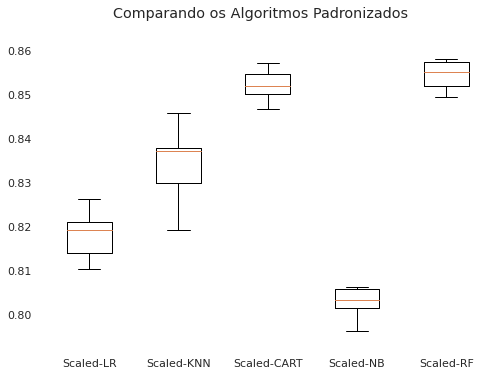

In [53]:
# De acordo com os resultados anteriores, os modelos criados com DecisionTree e Random Forest apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [54]:
# Embora o Random Forest tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# # Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Possíveis valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85605,std:0.00387,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.85427,std:0.00373,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.85516,std:0.00346,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.85575,std:0.00328,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.85566,std:0.00348,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.85492,std:0.00256,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.85443,std:0.00327,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.85486,std:0.00362,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.85578,std:0.00301,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.8551,std:0.0034,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 20, 'criterion': 'gini'}, Score:0.8560549136654447


In [55]:
# Vamos agora ajustar os parâmeros do DecisionTree.

# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Definindo a profundidade máxima da árvore.
max_depth = list(range(1, 31))

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']


# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# Criando o modelo
tree = DecisionTreeClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85516,std:0.00287,params:{'max_depth': 15, 'criterion': 'gini'}
mean:0.85412,std:0.00292,params:{'max_depth': 19, 'criterion': 'entropy'}
mean:0.85249,std:0.00222,params:{'max_depth': 23, 'criterion': 'entropy'}
mean:0.85529,std:0.00309,params:{'max_depth': 14, 'criterion': 'gini'}
mean:0.85176,std:0.00282,params:{'max_depth': 24, 'criterion': 'gini'}
mean:0.85403,std:0.00322,params:{'max_depth': 16, 'criterion': 'gini'}
mean:0.85172,std:0.00329,params:{'max_depth': 25, 'criterion': 'gini'}
mean:0.85209,std:0.00323,params:{'max_depth': 26, 'criterion': 'gini'}
mean:0.85292,std:0.00297,params:{'max_depth': 19, 'criterion': 'gini'}
mean:0.85249,std:0.00297,params:{'max_depth': 20, 'criterion': 'gini'}

Melhor parâmetro:{'max_depth': 14, 'criterion': 'gini'}, Score:0.8552869778115403


In [56]:
# Preparando a versão final do modelo.
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)

print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.8563004821719234

 [[23462  1258]
 [ 3421  4420]]

               precision    recall  f1-score   support

           0       0.87      0.95      0.91     24720
           1       0.78      0.56      0.65      7841

    accuracy                           0.86     32561
   macro avg       0.83      0.76      0.78     32561
weighted avg       0.85      0.86      0.85     32561



In [57]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)

####  <span style="color:Blue">  Pré-processamento de Dados </span>

3) Faça um pré-processamento nos dados antes de aplicar os algoritmos de Machine learning.

* **a)** Aplique algum padronizador ou normalizador nos dados numéricos.
* **b)** Explique qual técnica você usou e por quê.

**Como Fazer?**

Nesta etapa são feitas transformações nos atributos númericos para evitar que os algoritmos de Machine Learning sofram com diferentes escalas de valores e produzam resultados ruins.

Explicamos essas tranformações em detalhes no capítulo **Pré-Processamento de Dados**. 

Aprendemos o funcionamento e aplicação do **MinMax Scaler**, **Standard Scaler**, **Normalizer** etc.

Assista essas aulas e aplique alguma das técnicas citadas acima.

####  <span style="color:Blue">  Classificação e Avaliação de Modelos </span>

4) Treine pelo menos dois algoritmos supervisionados voltados para tarefas de classificação.

* **a)** Avalie os modelos separando os dados de **treino** e **teste** (use train_test_split).
* **b)** Avalie os modelos usando **Cross Validation** (Crie uma função para repetir menos código).
* **c)** Explique a diferença entre de cada uma das abordagens acima com suas vantagens e desvantagens.
* **d)** Imprima os resultados para cada modelo e abordagem de avaliação utilizando as métricas **Precisão**, **Recall** e **F1 Score**.

**Como fazer?**

Todos os requisitos necessários para completar as etapas dessa tarefa se encontram no capítulo de Machine Learning.

Para o entendimento completo das **Técnicas de Avaliação de Modelos** cobradas, veja as aulas:
* **Machine Learning  - Métricas de Avaliação de Modelos** 
* **Machine Learning  - Entendendo o que é a Matriz de Confusão**.

####  <span style="color:Blue"> Tunning do Modelo </span>

5) Faça um Tunning dos modelos e verifique o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.
* Implemente usando Pipelines.
* Avalie os modelos usando **Cross Validation** (Utilize o recuso já integrado ao Pipeline).

**Como fazer?**

Consulte o capítulo **Machine Learning** e utilize o recurso de **GridSearch**.

Veja as aulas sobre **Pipelines** e **Métricas de Avaliação de Modelos**.